# 02 - 데이터프레임 결합


## 1.환경준비

* 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [3]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [6]:
products.head()
# LeadTime 공급시간

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [5]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## 2.결합1 : 붙이기 concat()

* 데이터를 생성해 봅시다.

In [9]:
print(df1)

    A   B
0  10  15
1  25  30


In [8]:
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
df2.drop([1],axis = 0, inplace = True)
#axis = 0 디폴트값
display(df1)
display(df2)

,A,B
0,10,15
1,25,30


,A,C
0,20,35
2,50,40


#### (1) 세로로 합치기 : axis = 0

* join = 'inner'

In [11]:
temp = pd.concat([df1, df2], axis = 0, join = 'inner')
temp

,A
0,10
1,25
0,20
2,50


In [10]:
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


* join = 'outer'

In [12]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


#### (2) 가로로 합치기 : axis = 1

* join = 'inner'

In [13]:
print(df1)
print(df2)

    A   B
0  10  15
1  25  30
    A   C
0  20  35
2  50  40


In [15]:
temp2 = pd.concat([df1, df2], axis = 1, join = 'inner')
temp2

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [17]:
pd.concat([df1, df2], axis = 1, join = 'outer') # NaN 결측치 

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [19]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [20]:
sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
165,366,2013-01-01,2,0.0,3
166,368,2013-01-01,2,0.0,5
167,370,2013-01-01,2,0.0,7
168,371,2013-01-01,2,0.0,8
169,373,2013-01-01,2,0.0,10


In [22]:
sales0 = pd.concat([sales1,sales2,sales5,sales11] ,join = 'inner' ,axis= 0  )
sales0
# 열, 구조가 같으면 outer, inner 같다.

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.000,3
1,5,2013-01-01,1,0.000,5
2,7,2013-01-01,1,0.000,7
3,8,2013-01-01,1,0.000,8
4,10,2013-01-01,1,0.000,10
...,...,...,...,...,...
24340,53548,2013-01-31,11,10.000,22
24341,53550,2013-01-31,11,641.507,24
24342,53553,2013-01-31,11,0.000,27
24343,53555,2013-01-31,11,27.000,29


[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



## 3.결합 ① : 조인 join(merge)

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [23]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### (1) inner merge

In [24]:
pd.merge(df1, df2, how = 'inner', on = 'A')

,A,B,C,D
0,2,30,25,20


In [25]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


In [26]:
pd.merge(df1,df2)

,A,B,C,D
0,2,30,25,20


### (2) left merge!!!!!!!!!!!!!!!! 실전에서 많이 쓰인다 !!!!!!!!!!!!!!!!!
concat은 out이 기본값.. merge는 inner 가 기본값

In [29]:
display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


In [27]:
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### (3) right merge!!!!!!!!!!!!

In [28]:
pd.merge(df1, df2, how = 'right')

,A,B,C,D
0,2,30.0,25.0,20
1,3,NaN,NaN,35


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



[문3] 도시별, 총판매량 합계를 구하시오.  



### (4) pivot
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [71]:
# 1) 매장1의 일별 카테고리별 판매량을 집계

temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [72]:
# 2) pivot
temp3 = temp2.pivot( 'Category', 'Date' ,'Qty')
temp3

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
Category,,,,,,,,,,,,,,,,,,,,,
Drink,0.0,1158.000,985.000000,1055.000000,1319.000,407.000,1267.000,1115.000,1290.00000,914.000,...,1114.000,1152.000,924.000,1213.000,1132.000,417.000,830.000,999.000,1140.000,971.000
Food,0.0,1227.652,913.699000,790.366000,901.057,416.912,852.676,829.851,967.58200,775.515,...,780.201,1025.047,791.388,836.856,880.019,416.783,821.064,668.154,900.092,751.766
Grocery,0.0,3305.130,2613.685001,2711.079001,2746.782,926.282,2689.720,2356.277,3023.57298,1933.235,...,2242.216,2824.296,2221.805,2393.208,2257.907,1162.207,2208.364,2001.047,2662.485,1907.797
Household Goods,0.0,1070.000,836.000000,834.000000,821.000,257.000,830.000,830.000,917.00000,687.000,...,786.000,769.000,622.000,701.000,551.000,247.000,625.000,617.000,932.000,711.000


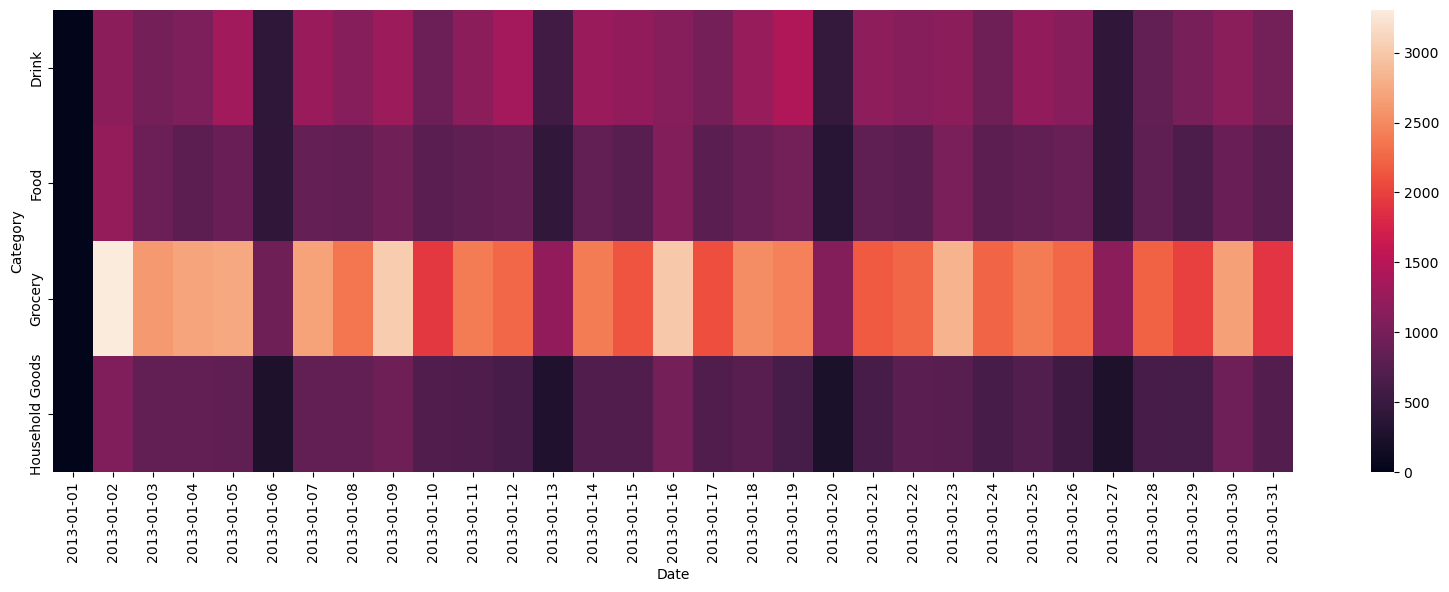

In [73]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## 4.복습문제

In [30]:
# 라이브러리 불러오기
import pandas as pd

In [4]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [32]:
sales.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7


In [33]:
products.head(3)

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23


In [34]:
stores.head(3)

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4


1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [45]:
# sales2 = pd.merge( sales, products.loc[:, ['Product_ID','Price']], how = 'inner' , on = 'Product_ID' ) 
# sales2.head()

In [62]:
sales2 = pd.merge( sales, products, how = 'inner' , on = 'Product_ID' )
sales2.head()

# sales2 = pd.merge( sales, products, how = 'inner' , on = 'Product_ID' ) 
# sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8
1,36,2013-01-01,10,0.0,3,DB001,Beverage,Drink,2,8
2,69,2013-01-01,11,0.0,3,DB001,Beverage,Drink,2,8
3,102,2013-01-01,12,0.0,3,DB001,Beverage,Drink,2,8
4,135,2013-01-01,13,0.0,3,DB001,Beverage,Drink,2,8


In [63]:
sales2['Amt'] = sales2['Qty'] *sales2['Price']
sales2.head()

# sales2['Amt'] = sales2['Qty'] * sales2['Price'] 
# sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8,0.0
1,36,2013-01-01,10,0.0,3,DB001,Beverage,Drink,2,8,0.0
2,69,2013-01-01,11,0.0,3,DB001,Beverage,Drink,2,8,0.0
3,102,2013-01-01,12,0.0,3,DB001,Beverage,Drink,2,8,0.0
4,135,2013-01-01,13,0.0,3,DB001,Beverage,Drink,2,8,0.0


2) 상품(Product_Code)별 매출액

In [64]:
sales2.groupby('Product_Code',as_index = False)['Amt'].sum()

,Product_Code,Amt
0,DA001,1.062816e+06
1,DB001,1.336522e+07
2,FB001,3.298673e+06
3,FF001,3.423657e+06
4,FM001,2.094948e+06
5,FP001,2.456785e+06
6,GA001,2.419344e+07
7,GE001,1.017210e+06
8,GM001,9.063631e+06
9,GS001,1.188430e+06


3) City별 카테고리리별 매출액

In [66]:
# column 이름이 같은걸 찾아야 한다.
# 1. sales2 와  stores 를 merge (store_id)
sales3 = pd.merge( sales2, stores, how = 'inner' , on = 'Store_ID' )
sales3.head()
# pd.merge( sales2, stores, how = 'inner' , on = 'Store_ID' )
# 2. groupby (0206 복습하기)
sales3.groupby(['City', 'Category'], as_index = False)['Amt'].sum()

# 1. sales2와 stores 를 merge sales3 = pd.merge( sales2, stores , how = 'inner', on = 'Store_ID') sales3.head() # 2. groupby sales3.groupby( [ 'City', 'Category'], as_index = False )['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


지역별로 어떤 카테고리의 매출액이 높은지 비교하고 싶어요.

df.groupby(['지역','카테고리'], as_index = False)['금액'].sum()

4) 매출액이 가장 높은 주(state) top 3
* state별 매출액 합계
* 매출액 기준 정렬(내림차순)
* .head(3)

In [70]:
temp = sales3.groupby('State', as_index = False)['Amt'].sum()
temp.sort_values('Amt', ascending=False).head(3) # Amt 기준으로 정렬
# e +07 = 10의 7승 
# e -07 = 10의 -7승 

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06


# 무조건 풀어보고 이해해야하는 문제

### 문제) 2013년 1월 셋째주 각 도시별 상품(SubCategory)별 매출액 비교
* 수도코드(의사코드) : 우리 말로 알고리즘을 순차적으로 정리해 놓은 것

2013년 1월 셋째주 각 도시별 상품(SubCategory)별 매출액 비교

1. 2013년 1월 셋째주
    * sales['Date'] : pd.to_datetime() 으로 변환
    * sales['Week'] 만들기 : .dt.weekofyear / .dt.week
    * sales['Week'] == 3 인 것 가져와. sales.loc[ ]
2. 각 도시별 상품(SubCategory) 별
    * 1위 결과, stores 머지.(stores['City'])
    * 위 결과, products 머지. ( products['Price'],products['SubCategory'])
3. 각 도시별 상품(SubCategory)별 매출액 비교
    * Amt 만들기 : Qty * Price 
    * groupby

* 수도코드(의사코드) : 우리 말로 알고리즘을 순차적으로 정리해 놓은 것

In [5]:
#1. 

sales['Date'] = pd.to_datetime(sales['Date']) 
sales['Week'] = sales['Date'].dt.isocalendar().week 
sales2 = sales.loc[ sales['Week'] == 3 ]

In [10]:
#2. 

temp1 = pd.merge(sales2, stores) 
temp2 = pd.merge(temp1, products)
temp2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Week,City,State,Store_Type,Product_Code,SubCategory,Category,LeadTime,Price
0,23169,2013-01-14,1,1178.0,3,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
1,24951,2013-01-15,1,1149.0,3,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
2,26733,2013-01-16,1,1043.0,3,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
3,28515,2013-01-17,1,898.0,3,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
4,30297,2013-01-18,1,1130.0,3,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8


In [11]:
#3.  merge의 디폴트는 inner 

temp2['Amt'] = temp2['Qty'] * temp2['Price'] 
temp2.groupby( [ 'City', 'SubCategory'], as_index = False)['Amt'].sum()

,City,SubCategory,Amt
0,Albany,Agricultural products,67224.0
1,Albany,Alcohol,6336.0
2,Albany,BAKERY,7530.0
3,Albany,Beverage,45360.0
4,Albany,Cleaning,61365.0
...,...,...,...
289,Wilmington,Kitchen,0.0
290,Wilmington,Meats,0.0
291,Wilmington,Milk,0.0
292,Wilmington,Prepared,0.0
